Продовольственная компания хочет получить максимальную прибыль для следующей рекламной кампании, запланированной на следующий месяц. 

Была проведена пилотная кампания с участием 2,240 клиентов. Клиенты, купившие предложение, были должным образом помечены. Общая стоимость тестовой кампании составила 6,720 млн, а доход составил 3,674 млн. В глобальном масштабе кампания принесла убыток в размере 3,046 млн, а показатель успеха кампании составил 15%. 

**Цель:** Определить насколько эффективна была маркетинговая кампания и в каких классах она была более успешной, а также разработать модель, которая предсказывает поведение клиентов, и применить ее к остальной клиентской базе

`Датасет был найден на просторах kaggle https://www.kaggle.com/datasets/jackdaoud/marketing-data`

## Описание датасета

- Income: Годовой доход, $
- Year_Birth: Год рождения
- Marital: Семейное положение
- Education: Уровень образования
- Kidhome: Количество детей дома
- Teenhome: Количество подростков дома
- Recency: Сколько дней прошло с момента последней покупки
- MntWines: Сумма, потраченная на вино за последние два года
- MntFruits: Сумма, потраченная на фрукты за последние два года
- MntMeatProducts: Сумма, потраченная на мясо за последние два года
- MntFishProducts: Сумма, потраченная на рыбу за последние два года
- MntSweetProducts: Сумма, потраченная на сладости за последние два года
- MntGoldProds: Сумма, потраченная на золото за последние два года
- NumDealsPurchases: Количество покупок со скидкой
- NumWebPurchases: Количество покупок, сделанных через интернет сайт компании
- NumCatalogPurchases: Количество покупок, сделанных через каталог
- NumStorePurchases: Количество прямых покупок в магазине
- NumWebVisitsMonth: Количество посещений сайта компании за последний месяц
- AcceptedCmp1: 1-если было принято предложение первой кампании
- AcceptedCmp2: 1-если было принято предложение второй кампании
- AcceptedCmp3: 1-если было принято предложение третьей кампании
- AcceptedCmp4: 1-если было принято предложение четвертой кампании
- AcceptedCmp5: 1-если было принято предложение пятой кампании
- Complain: наличие жалоб за последние 2 года (1-если имел)
- Response (target): Принятие предложение последней кампании (1-если да)
- DtCustomer: Дата регистрации клиента в компании 

## Импорт, скачивание датасета и получение первичной информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, \
recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, \
mean_absolute_error, r2_score, roc_auc_score, precision_score
pd.set_option('display.max_columns', 50) 

In [2]:
df = pd.read_csv("marketing_data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,646.776623,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2239.000000,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Пропуски', 1 : '%'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '%', ascending=False).round(1)
    print ("Датафрейм имеет " + str(df.shape[1]) + " столбцов.\n"      
        "В датасете " + str(mis_val_table_ren_columns.shape[0]) +
            " колонок с пропущенными значениями.")
    return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Датафрейм имеет 29 столбцов.
В датасете 1 колонок с пропущенными значениями.


,Пропуски,%
Income,24,1.1


In [7]:
df.duplicated().sum()

0

Необходимо привести столбец income к числовому формату данных (удалить знак $) для дальнейшего анализа, а также удалить пробелы в названии столбца. также для удобства приняло решение привести названия столбцов к нижнему регистру.

Так как пропуски в столбце Income составляют только 1% от всех данных, принято решение удалить строки с пропущенными значениями, так как 1% сильно не скажется на результатах анализа.

Дубликаты отсутсвуют, их обрабатывать не нужно

## Обработка и анализ данных

In [8]:
df.columns = [x.strip().lower() for x in list(df.columns)]

df.columns

Index(['unnamed: 0', 'id', 'year_birth', 'education', 'marital_status',
       'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [9]:
df.dropna(inplace = True)
missing_values_table(df)

Датафрейм имеет 29 столбцов.
В датасете 0 колонок с пропущенными значениями.


,Пропуски,%


In [10]:
df['income'] = df['income'].str.split('$').str[1].str.replace(',','').astype(float)
df['income'].dtype

dtype('float64')

In [11]:
df.describe()

,unnamed: 0,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1117.341606,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,646.454153,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,558.750000,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1116.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1675.250000,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разделим на группы людей с высоким, низким и средним доходом. Примем, что люди, которые зарабатывают менее 35000 долларов в год - люди с достатком ниже среднего, а больше 68000 - выше среднего соответственно.

In [12]:
df['income_group'] = df['income'].apply(lambda x: 'выше среднего' if x > 68000 
                   else 'ниже среднего' if x <= 35000 
                   else 'средний')

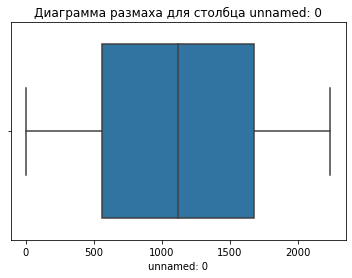

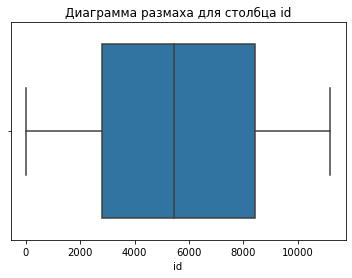

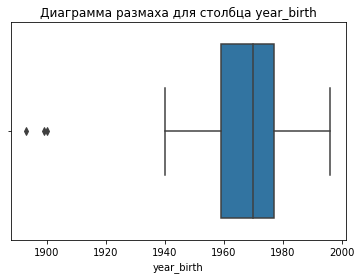

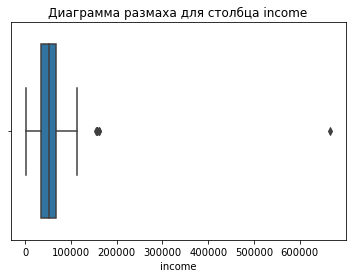

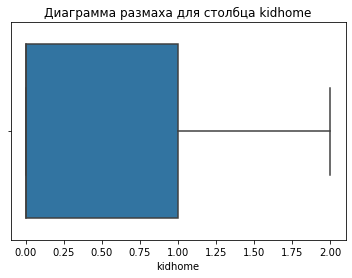

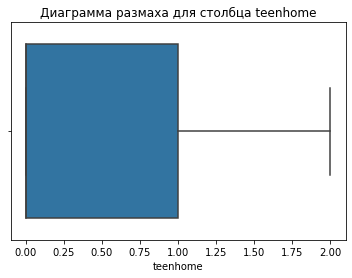

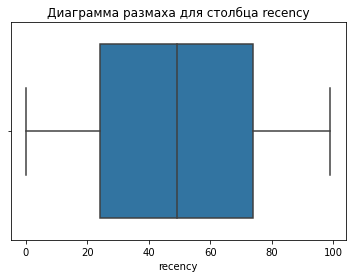

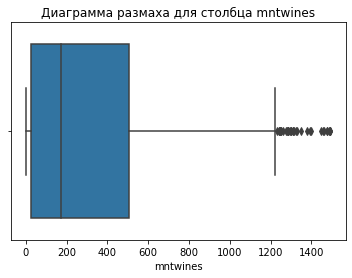

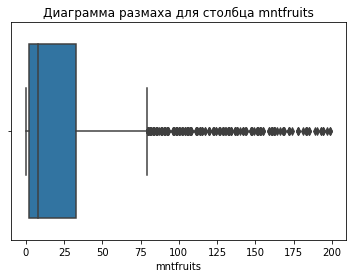

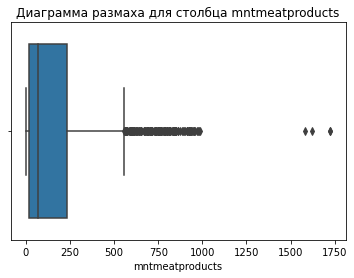

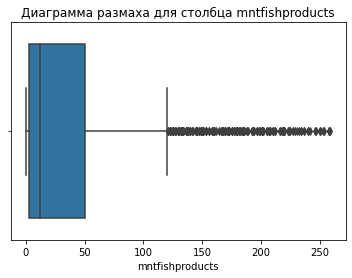

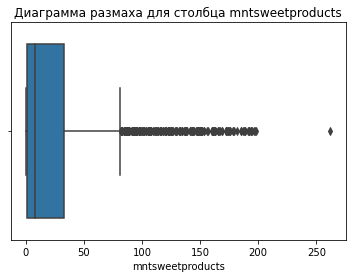

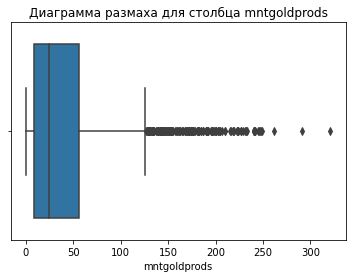

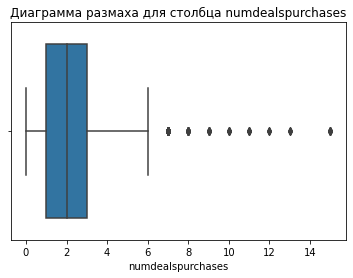

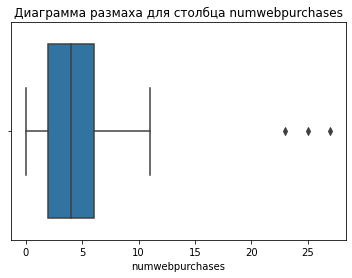

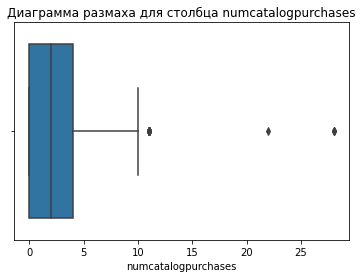

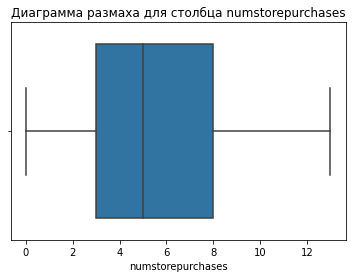

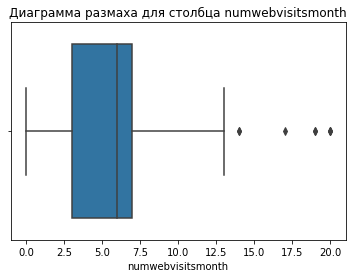

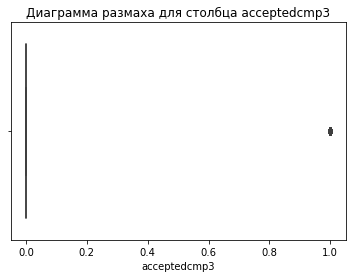

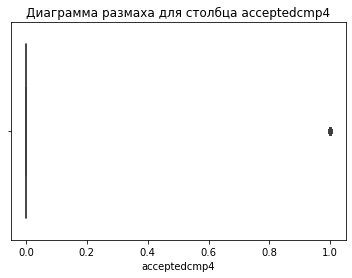

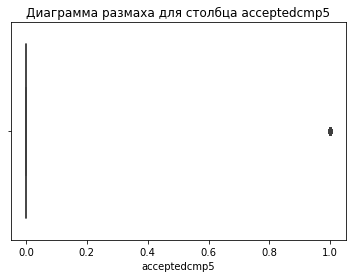

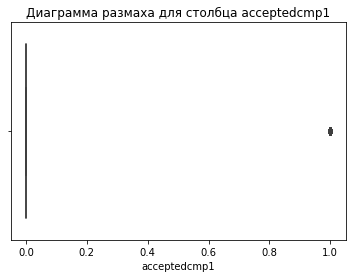

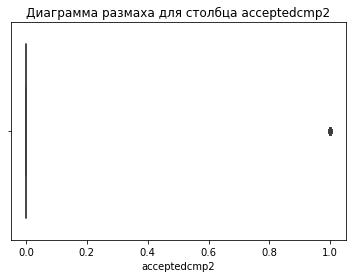

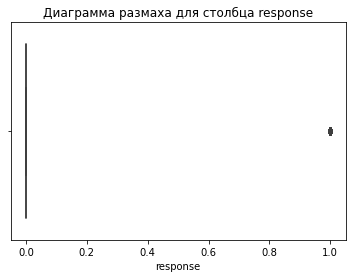

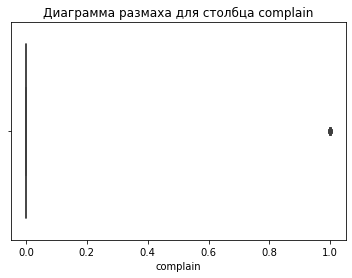

In [13]:
for x in df.columns:
    if df[x].dtype != 'O':
        sns.boxplot(df[x])
        plt.title('Диаграмма размаха для столбца ' + str(x))
        plt.show()

в столбце год рождения есть значения около 1900 и даже меньше. Дальше в столбце доход есть сильно большое значение, выбивающееся от остальных. Стоит взглянуть на эти строки, есть большая вероятность того, что это выбросы

In [14]:
df[df['year_birth'] < 1940]

,unnamed: 0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,income_group
513,513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,средний
827,827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,выше среднего
2233,2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,средний


Не думаю, что пожилой человек в возрасте 113-121 лет может иметь тинейджера или маленького ребенка, здесь вероятнее всего какая-то опечатка. Но чтобы не искажать данные мы просто удалим эти строки, так как они составляют всего менее 1%

In [15]:
df[df['income'] > 600000]

,unnamed: 0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,income_group
527,527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,выше среднего


In [16]:
df = df[df['year_birth'] >= 1940].reset_index(drop=True)
df = df[df['income'] <= 600000].reset_index(drop=True)

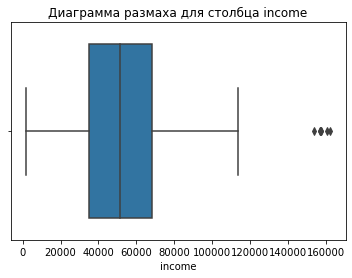

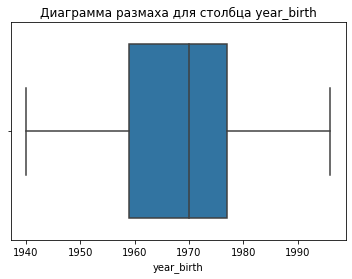

In [17]:
for x in ['income', 'year_birth']:
    sns.boxplot(df[x])
    plt.title('Диаграмма размаха для столбца ' + str(x))
    plt.show()


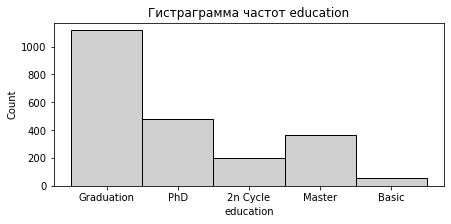

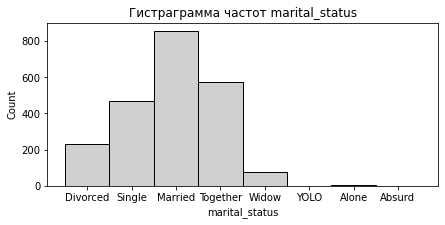

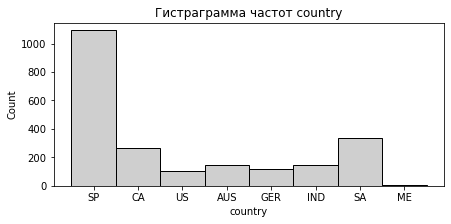

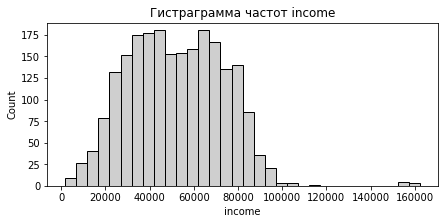

In [18]:
for column in ['education', 'marital_status', 'country', 'income']:
    plt.figure(figsize=(7,3))
    sns.histplot(df[column], color='silver')
    plt.title(f'Гистраграмма частот {column}')
    plt.show()

Больше всего в данных представлены люди из Испании с образованием бакалавриата имеющие мужа/жену. Можно сказать, что доход распределен нормально.

In [19]:
df['kids_total'] = df['kidhome'] + df['teenhome']

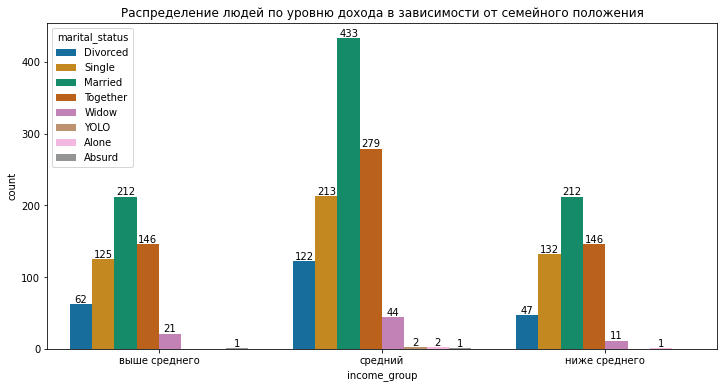

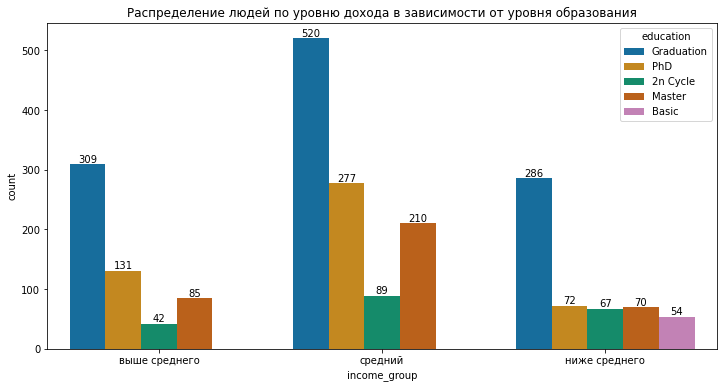

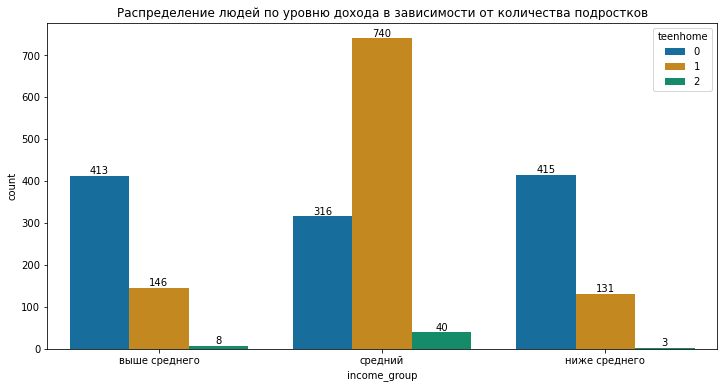

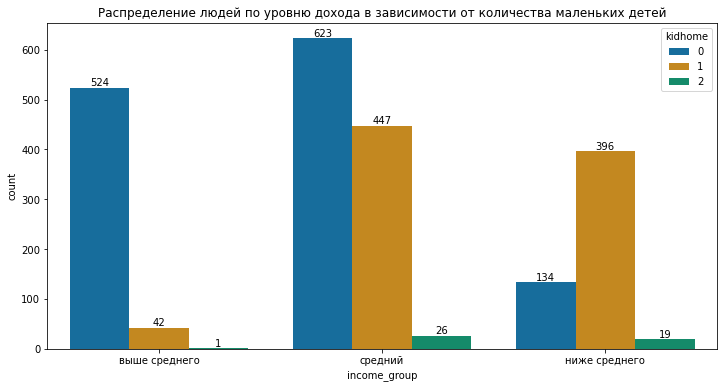

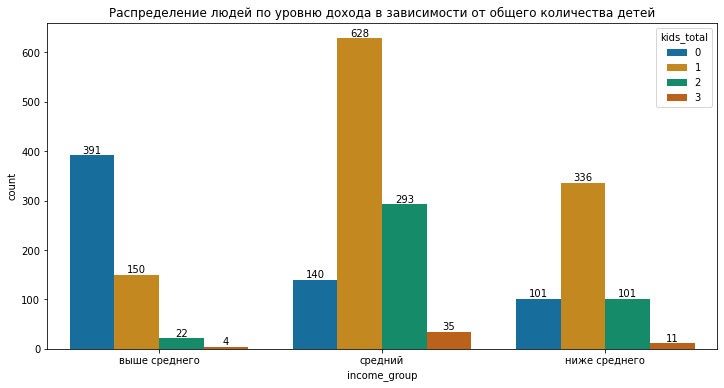

In [20]:
column_name = {
    'marital_status': 'семейного положения', 
    'education': 'уровня образования', 
    'teenhome': 'количества подростков',
    'kidhome': 'количества маленьких детей',
    'kids_total': 'общего количества детей'
}
for column in ['marital_status', 'education', 'teenhome', 'kidhome', 'kids_total']:
    plt.figure(figsize=(12,6))
    pic = sns.countplot(df['income_group'], hue=df[column], palette='colorblind')
    for i in pic.containers :
        plt.bar_label(i)
    plt.title(f'Распределение людей по уровню дохода в зависимости от {column_name[column]}')

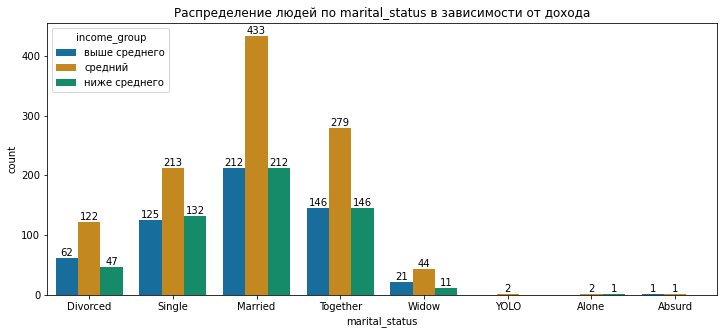

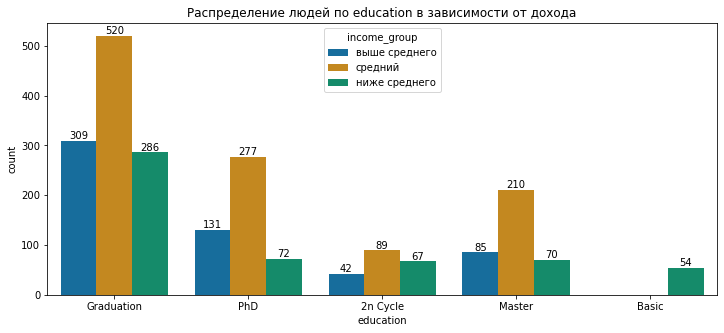

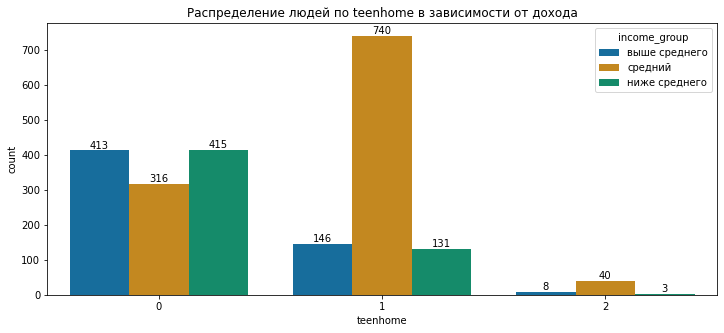

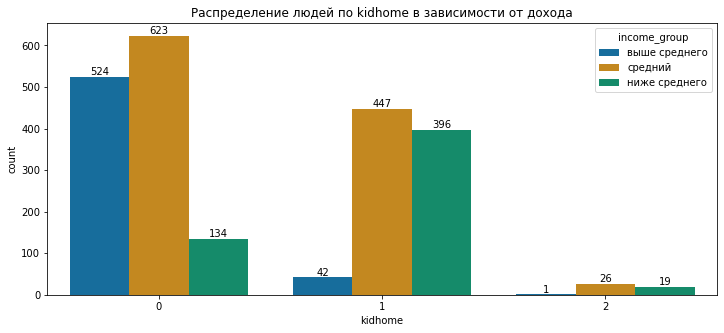

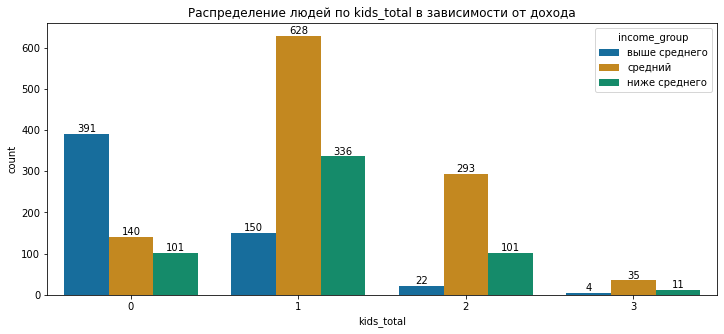

In [21]:
for column in ['marital_status', 'education', 'teenhome', 'kidhome', 'kids_total']:
    plt.figure(figsize=(12,5))
    pic = sns.countplot(df[column], hue=df['income_group'], palette='colorblind')
    for i in pic.containers :
        plt.bar_label(i)
    plt.title(f'Распределение людей по {column} в зависимости от дохода')

Можно сделать вывод, что больше всего зарабатывают женатые люди без детей с образованием бакалавриата. 

Средний доход и доход ниже среднего чаще всего имеют люди с одним ребенком, причем интересно, что чаще всего это один подросток. А доход ниже среднего чаще всего имеют люди с одним маленьким ребенком. Возможно это можно связать с тем, что до определенного возраста ребенка один из родителей не работает и общий доход семьи значительно снижается.

Также сильно влияет низкий уровень образования на уровень доходов

In [22]:
df['mnttotal'] = df['mntwines'] + df['mntfruits'] + \
df['mntmeatproducts'] + df['mntfishproducts'] + \
df['mntsweetproducts'] + df['mntgoldprods']

<AxesSubplot:xlabel='mnttotal', ylabel='income'>

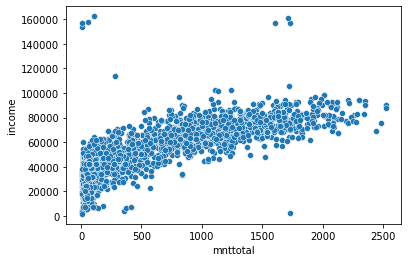

In [23]:
sns.scatterplot(data=df, x="mnttotal", y="income")

In [24]:
mnt_df = df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods']].sum()

mnt_df = round((mnt_df / df.mnttotal.sum()) * 100, 1)

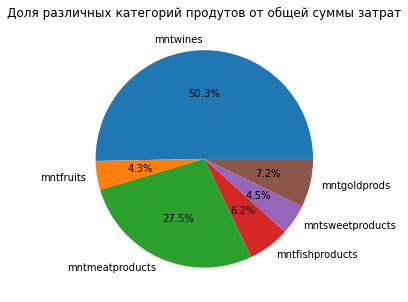

In [25]:
mnt_df.plot(kind='pie', ylabel = "", autopct = "%.1f%%", figsize = (12,5))
plt.title('Доля различных категорий продутов от общей суммы затрат')
plt.show()

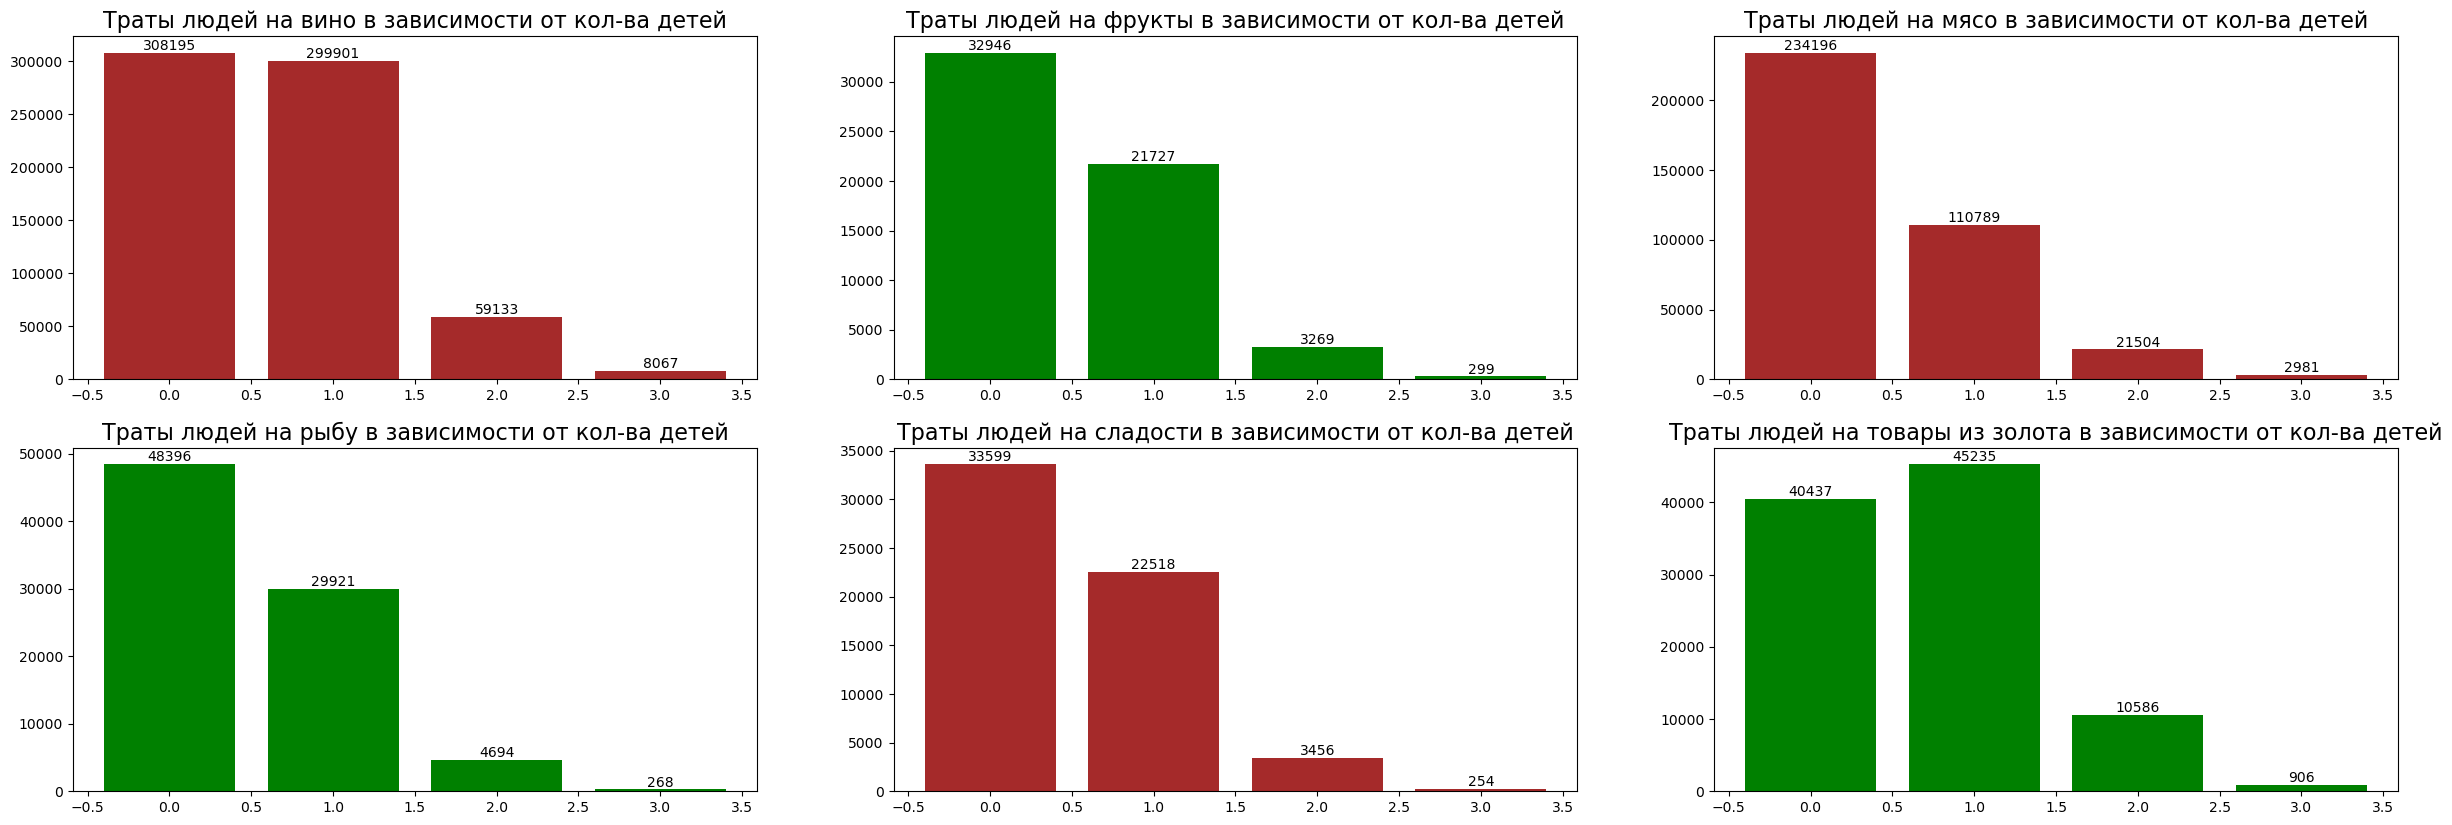

In [26]:
pic, ((pic1, pic2, pic3), (pic4, pic5, pic6)) = plt.subplots(nrows=2, ncols=3, figsize=(30, 10), dpi=100)
pic1.bar(data=df, 
         x = df.groupby('kids_total')['mntwines'].sum().index, 
         height = df.groupby('kids_total')['mntwines'].sum().values, 
         color='brown')
pic1.set_title('Траты людей на вино в зависимости от кол-ва детей', fontsize=16)
for i in pic1.containers:
    pic1.bar_label(i)


pic2.bar(data=df, 
         x = df.groupby('kids_total')['mntfruits'].sum().index, 
         height = df.groupby('kids_total')['mntfruits'].sum().values, 
         color='green')
pic2.set_title('Траты людей на фрукты в зависимости от кол-ва детей', fontsize=16)
for i in pic2.containers:
    pic2.bar_label(i)

pic3.bar(data=df, 
         x = df.groupby('kids_total')['mntmeatproducts'].sum().index, 
         height = df.groupby('kids_total')['mntmeatproducts'].sum().values, 
         color='brown')
pic3.set_title('Траты людей на мясо в зависимости от кол-ва детей', fontsize=16)
for i in pic3.containers:
    pic3.bar_label(i)

pic4.bar(data=df, 
         x = df.groupby('kids_total')['mntfishproducts'].sum().index, 
         height = df.groupby('kids_total')['mntfishproducts'].sum().values, 
         color='green')
pic4.set_title('Траты людей на рыбу в зависимости от кол-ва детей', fontsize=16)
for i in pic4.containers:
    pic4.bar_label(i)


pic5.bar(data=df, 
         x = df.groupby('kids_total')['mntsweetproducts'].sum().index, 
         height = df.groupby('kids_total')['mntsweetproducts'].sum().values, 
         color='brown')
pic5.set_title('Траты людей на сладости в зависимости от кол-ва детей', fontsize=16)
for i in pic5.containers:
    pic5.bar_label(i)

pic6.bar(data=df, 
         x = df.groupby('kids_total')['mntgoldprods'].sum().index, 
         height = df.groupby('kids_total')['mntgoldprods'].sum().values, 
         color='green')
pic6.set_title('Траты людей на товары из золота в зависимости от кол-ва детей', fontsize=16)
for i in pic6.containers:
    pic6.bar_label(i)
plt.show()

In [27]:
df['total_purchases'] = df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases']
prch_df = df[['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']].sum()

prch_df = round((prch_df / df.total_purchases.sum()) * 100, 1)

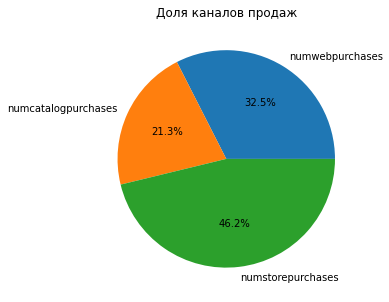

In [28]:
prch_df.plot(kind='pie', ylabel = "", autopct = "%.1f%%", figsize = (12,5))
plt.title('Доля каналов продаж')
plt.show()

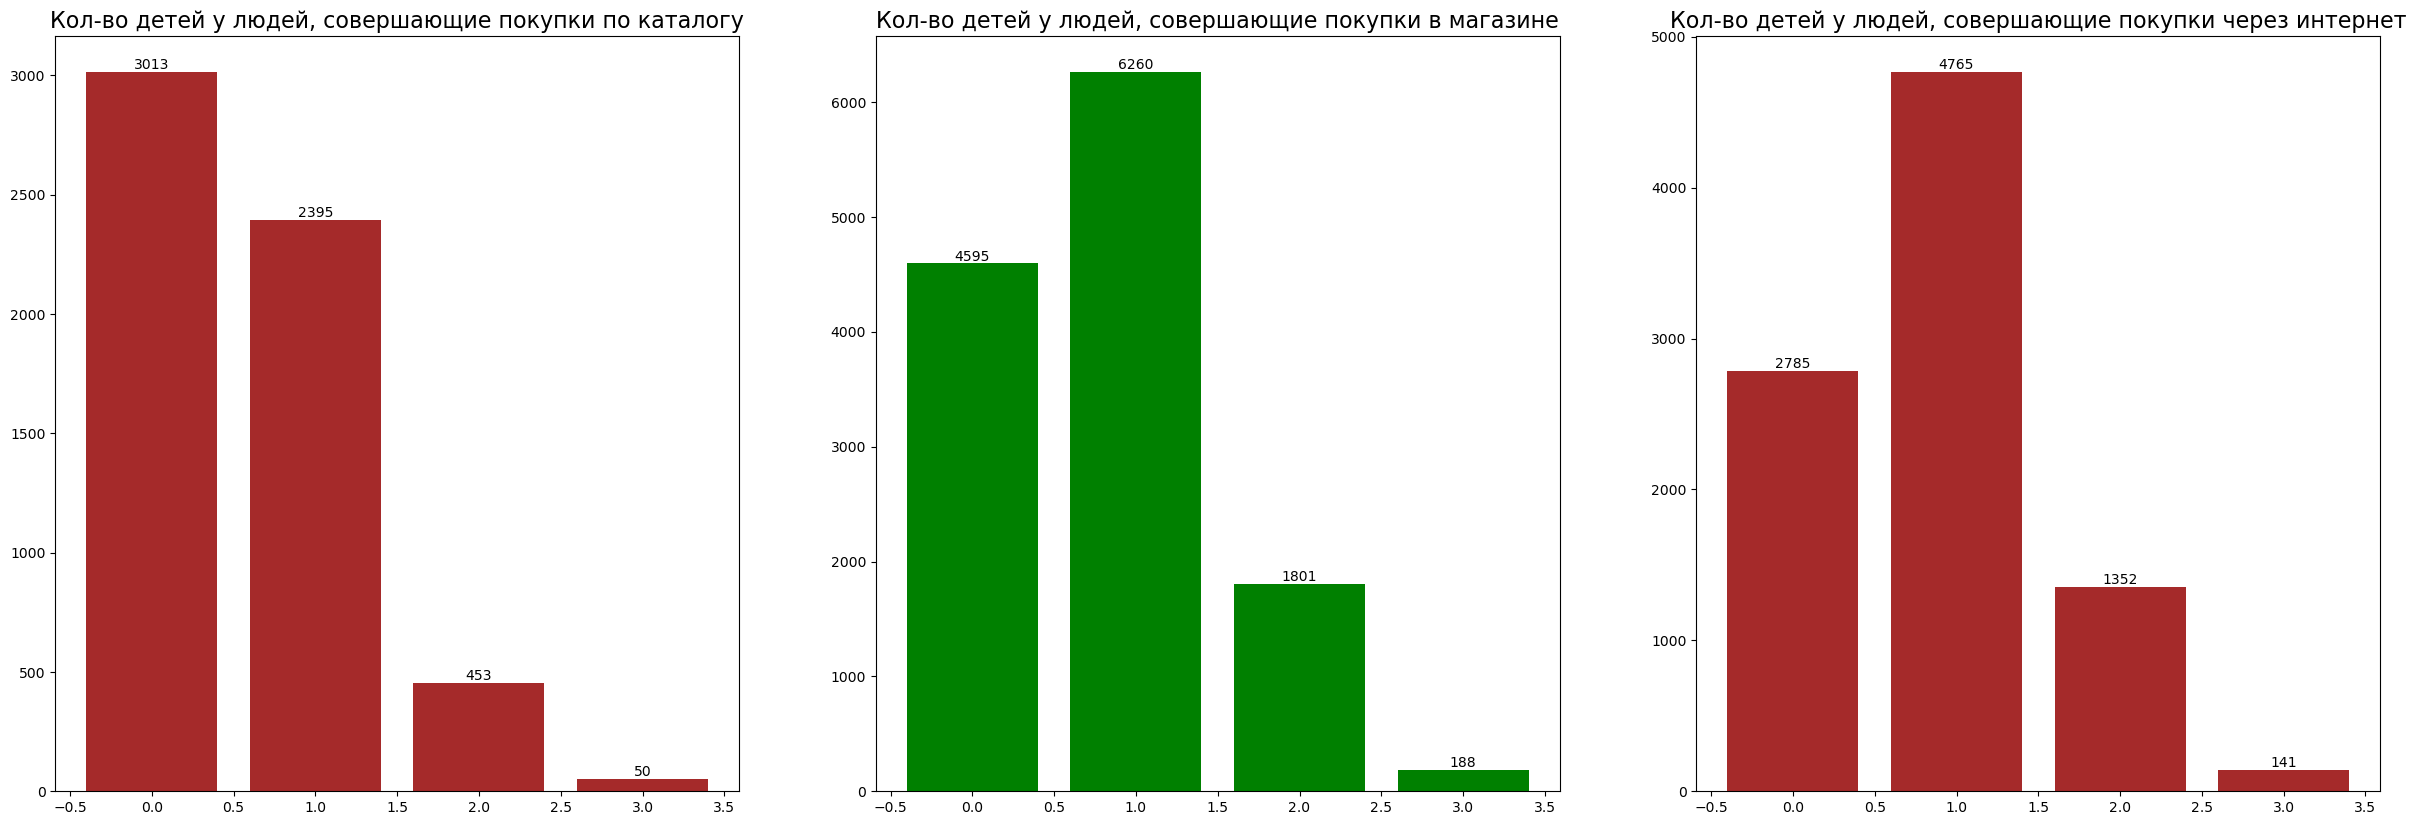

In [29]:
pic, ((pic1, pic2, pic3)) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), dpi=100)
pic1.bar(data=df, 
         x = df.groupby('kids_total')['numcatalogpurchases'].sum().index, 
         height = df.groupby('kids_total')['numcatalogpurchases'].sum().values, 
         color='brown')
pic1.set_title('Кол-во детей у людей, совершающие покупки по каталогу', fontsize=16)
for i in pic1.containers:
    pic1.bar_label(i)


pic2.bar(data=df, 
         x = df.groupby('kids_total')['numstorepurchases'].sum().index, 
         height = df.groupby('kids_total')['numstorepurchases'].sum().values, 
         color='green')
pic2.set_title('Кол-во детей у людей, совершающие покупки в магазине', fontsize=16)
for i in pic2.containers:
    pic2.bar_label(i)

pic3.bar(data=df, 
         x = df.groupby('kids_total')['numwebpurchases'].sum().index, 
         height = df.groupby('kids_total')['numwebpurchases'].sum().values, 
         color='brown')
pic3.set_title('Кол-во детей у людей, совершающие покупки через интернет', fontsize=16)
for i in pic3.containers:
    pic3.bar_label(i)
plt.show()

In [30]:
df.dt_customer.dtype

dtype('O')

In [31]:
# sns.boxplot(x='kids_total',y='customer_Days',data=df,palette='mako',hue='Complain')

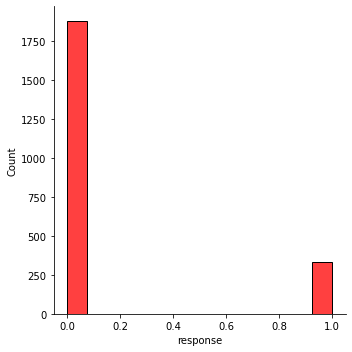

In [32]:
sns.displot(df['response'],kde=False,color='r')

Можно заметить, что с ростом дохода увеличиваются общие траты на продукты.

Доля вина в общей корзине составляет 50%. Интересно, это из-за его высокой стоимости или люди действительно покупают очень много вина? Было бы здорово взгялнуть на данные в штуках, но они, к сожалению, отсутсвуют...

Почти половина покупок была совершена напрямую в магазине, 32.5% составила доля продаж через интернет магазин, а меньше всего люди делают покупки через каталог

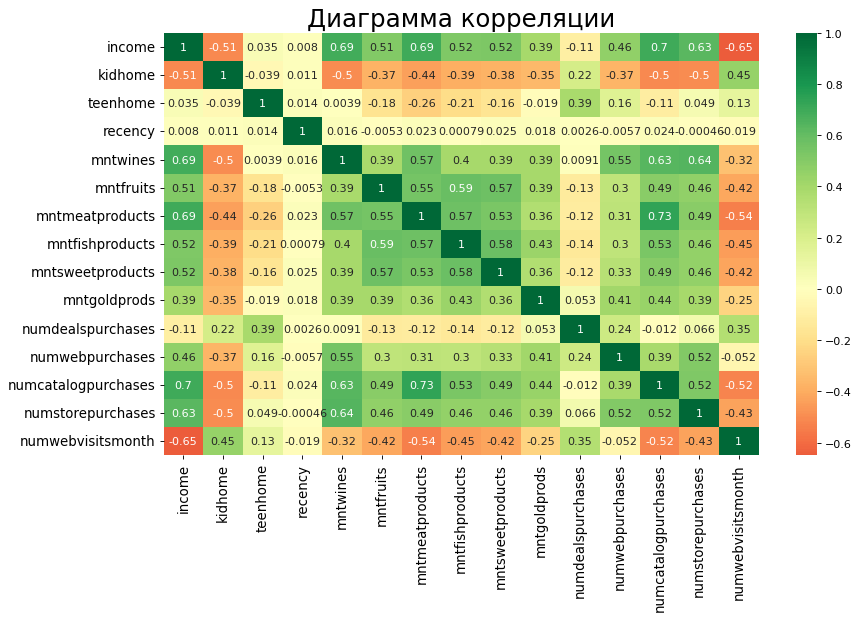

In [33]:
cor_columns = ['income', 'kidhome', 'teenhome','recency', 'mntwines',
                'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

plt.figure(figsize=(12,7), dpi= 80)
sns.heatmap(df[cor_columns].corr(), 
            xticklabels=df[cor_columns].corr().columns, 
            yticklabels=df[cor_columns].corr().columns, 
            cmap='RdYlGn', 
            center=0, 
            annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Доход является показателем, при увеличении которого увеличивается ряд других характеристик, таких как количество потраченных средств на мясо,вино рыбу, сладости и изделия из золота. Также при увеличении дохода увеличивается количества покупок через интернет, каталог и магазин. Однако, доход имеет отрицательную корреляцию с количеством детей дома и посещениями веб-сайтов.

Сумма, потраченная на вино, помимо того, что связана с высоким доходом, также положительна связанна с суммой, потраченной на мясо, а также с такими каналами продаж как каталог и прямые продажи из магазина.  


In [34]:
df['total_accepted'] = df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] + df['acceptedcmp1'] + \
       df['acceptedcmp2']

In [35]:
campaigns_col = df[['acceptedcmp3', 'acceptedcmp4', 
'acceptedcmp5', 'acceptedcmp1',
'acceptedcmp2']]

campaign_group = np.sum(campaigns_col, axis=0)
campaign_rating = round(campaign_group/len(campaigns_col)*100, 2)

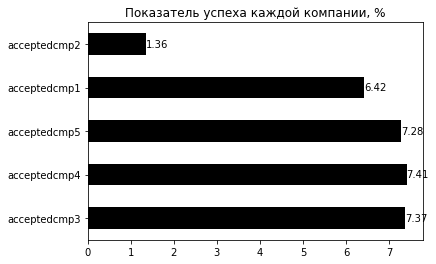

In [36]:
ax = campaign_rating.plot(kind='barh', color='black')
for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Показатель успеха каждой компании, %')
plt.show()

Показатель успеха всех рекламных компаний находится примерно на одном уровне, однако рекламная компания номер два вероятнее всего была не такой успешной.

## Логистическая регрессия

In [38]:
num_col = ['year_birth', 'income', 'kidhome',
       'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain']
cat_col = ['education', 'marital_status', 'country']

In [39]:
x = df.drop(['id', 'response', 'unnamed: 0', 'income_group', 
             'kids_total', 'total_purchases', 'total_accepted', 'mnttotal', 'dt_customer'], axis =1)
x = pd.get_dummies(x, columns = cat_col) #использование дамми кодирования 
y = df['response']
print('X: {}'.format(x.shape))
print('Y: {}'.format(y.shape))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('X train: {}'.format(x_train.shape))
print('X test: {}'.format(x_test.shape))
print('Y train: {}'.format(y_train.shape))
print('Y test: {}'.format(y_test.shape))

X: (2212, 43)
Y: (2212,)
X train: (1769, 43)
X test: (443, 43)
Y train: (1769,)
Y test: (443,)


In [40]:
scaler = StandardScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col]) 
x_test[num_col] = scaler.transform(x_test[num_col])

In [41]:
LR = LogisticRegression(penalty = 'l2')
LR.fit(x_train, y_train)
prediction = LR.predict(x_test)

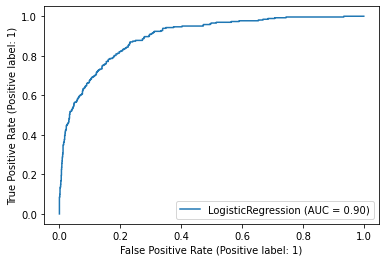

In [42]:
plot_roc_curve(LR, x_train, y_train)
#Сравнивается как меняется чувствительность по отношению к ложноположительным долям на разных порогах отсечения.

In [43]:
print('Accuracy :', accuracy_score(y_test, LR.predict(x_test)))
print('F1_score: ', f1_score(y_test, LR.predict(x_test)))
print('Recall: ', recall_score(y_test, LR.predict(x_test)))
print('Precision: ', precision_score(y_test, LR.predict(x_test)))

Accuracy : 0.8758465011286681
F1_score:  0.5454545454545454
Recall:  0.4647887323943662
Precision:  0.66


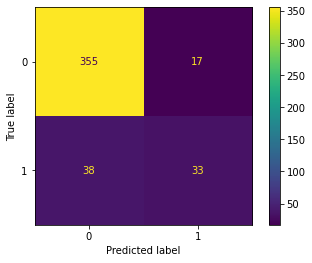

In [44]:
plot_confusion_matrix(LR, x_test, y_test)

Исходя из матрицы можно сделать вывод, что модель склонна предсказывать отрицательные ответы там, где их нет.

## Кластеризация

In [45]:
df = df[['unnamed: 0', 'id', 'year_birth', 'education', 'marital_status',
       'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'income_group',
       'kids_total', 'mnttotal', 'total_purchases', 'total_accepted']]

/var/folders/tl/8j14k_ks0p19yxmktb6y_ptc0000gn/T/ipykernel_40140/877207708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[num_col] = scaler.fit_transform(df[num_col])
/var/folders/tl/8j14k_ks0p19yxmktb6y_ptc0000gn/T/ipykernel_40140/877207708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[num_col] = scaler.fit_transform(df[num_col])
/var/folders/tl/8j14k_ks0p19yxmktb6y_ptc0000gn/T/ipykernel_40140/877207708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Text(0, 0.5, 'Score')

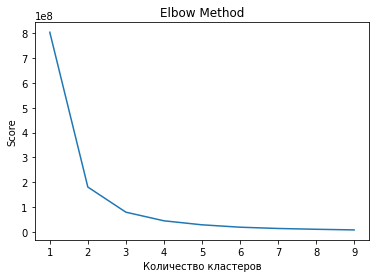

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df[['education', 'marital_status', 'income', 'kidhome', 
                'teenhome', 'numdealspurchases', 'numwebpurchases',
                'numcatalogpurchases', 'numstorepurchases', 
                'numwebvisitsmonth', 'country', 'kids_total', 
                'mnttotal', 'total_purchases', 'total_accepted',
               'response']]
df_scaled[num_col] = scaler.fit_transform(df[num_col])
df_scaled = pd.get_dummies(df_scaled, columns = cat_col)

scores = []
for i in range(1, 10):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 10), scores)
plt.title("Elbow Method")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")


In [47]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(df_scaled)
clusters


array([1, 1, 0, ..., 0, 2, 1], dtype=int32)

In [48]:
centroids = model.cluster_centers_
centroids



array([[-6.52243916e-01,  4.76580095e-01,  5.00679450e-02,
         8.82871240e-03, -4.98505822e-01, -6.37054068e-01,
        -6.37582128e-01,  4.10799636e-01,  1.23064645e+00,
         1.52932961e+02,  7.26336792e+00,  1.06145251e-01,
         1.01356744e-01,  1.21987778e-01, -1.34691348e-02,
        -6.81085269e-01, -4.91261488e-01, -5.97750206e-01,
        -5.04123695e-01, -4.90046864e-01, -4.51987073e-01,
        -2.54526524e-02, -1.76366550e-01, -2.74031228e-01,
        -2.35864954e-01, -8.96557016e-02,  1.40878792e-02,
         9.57701516e-02,  4.22984836e-02,  4.88427773e-01,
         1.70790104e-01,  2.02713488e-01, -2.05998413e-18,
         1.59616919e-03,  9.97605746e-02,  3.94253791e-01,
         2.16280926e-01,  2.59377494e-01,  2.71348763e-02,
         1.59616919e-03,  6.62410215e-02,  1.10933759e-01,
         4.94812450e-02,  7.18276137e-02, -4.33680869e-19,
         1.45251397e-01,  5.10774142e-01,  4.54908220e-02],
       [ 6.39333449e-01, -5.68597933e-01,  1.98665116e-

array([[<AxesSubplot:title={'center':'clusters'}>]], dtype=object)

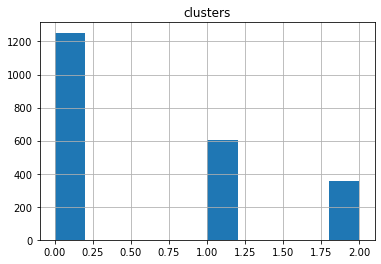

In [49]:
df_scaled['clusters']= clusters
df['clusters']= clusters
df_scaled.hist('clusters')

In [50]:
df.groupby('clusters').describe()[[ 'mntwines', 'mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].transpose()

clusters                          0            1            2
mntwines         count  1253.000000   601.000000   358.000000
                 mean     75.593775   473.589018   826.675978
                 std      96.346280   217.395544   295.401367
                 min       0.000000    47.000000     1.000000
                 25%      10.000000   315.000000   598.750000
                 50%      30.000000   448.000000   824.500000
                 75%     108.000000   606.000000  1011.250000
                 max     462.000000  1166.000000  1493.000000
mntfruits        count  1253.000000   601.000000   358.000000
                 mean      6.809258    43.425957    65.949721
                 std      11.146978    46.155804    48.611162
                 min       0.000000     0.000000     0.000000
                 25%       1.000000    10.000000    26.000000
                 50%       3.000000    26.000000    54.000000
                 75%       8.000000    61.000000    99.750000
                 max     103.000000   199.000000   190.000000
mntmeatproducts  count  1253.000000   601.000000   358.000000
                 mean     33.011971   228.915141   532.201117
                 std      36.203088   144.758585   261.601872
                 min       0.000000    21.000000    61.000000
                 25%       9.000000   123.000000   350.000000
                 50%      18.000000   193.000000   507.000000
                 75%      45.000000   305.000000   717.000000
                 max     288.000000   818.000000  1725.000000
mntfishproducts  count  1253.000000   601.000000   358.000000
                 mean     10.043097    61.271215    94.611732
                 std      17.634596    60.802204    66.391105
                 min       0.000000     0.000000     0.000000
                 25%       2.000000    13.000000    39.250000
                 50%       4.000000    40.000000    80.000000
                 75%      12.000000    93.000000   145.000000
                 max     179.000000   259.000000   258.000000
mntsweetproducts count  1253.000000   601.000000   358.000000
                 mean      6.914605    43.717138    69.522346
                 std      13.443999    44.361618    53.067985
                 min       0.000000     0.000000     0.000000
                 25%       1.000000     9.000000    27.000000
                 50%       3.000000    29.000000    55.500000
                 75%       8.000000    61.000000   107.000000
                 max     262.000000   195.000000   198.000000
mntgoldprods     count  1253.000000   601.000000   358.000000
                 mean     20.560255    70.549085    81.011173
                 std      27.943157    56.204371    63.422066
                 min       0.000000     0.000000     0.000000
                 25%       5.000000    29.000000    31.000000
                 50%      12.000000    54.000000    62.000000
                 75%      26.000000   100.000000   118.750000
                 max     321.000000   248.000000   249.000000

## ВЫВОД

*Был проанализирован датасет покупок в магазине. В ходе данной работы оставили необходимые столбцы, обработали пропуски, а также некоторые значения.*

***Можно сделать следующие выводы:***

- Больше всего в данных представлены люди из Испании с образованием бакалавриата имеющие мужа/жену.

- Доля вина в общей корзине составляет 50%
- Почти половина покупок была совершена напрямую в магазине, 32.5% составила доля продаж через интернет магазин, а меньше всего люди делают покупки через каталог
- Больше всего зарабатывают женатые люди без детей с образованием бакалавриата
- Средний доход и доход ниже среднего чаще всего имеют люди с одним ребенком. А доход ниже среднего чаще всего имеют люди с одним маленьким ребенком. 
- Низкий уровень образования отрицательно влияет на уровень доходов
- Увеличение дохода положительно влияет на общую трату денег на продукты (вино, мясо, сладости и др.), а также на количество совершенных заказов в различных каналах продаж.
- Были рассмотрены прошлый кампании ивыяснилось, что кампания №2 была не так успешна как остальные. 

В ходе проекта была проведена кластеризация, данные были разделены на 3 кластера в зависимости от своих характеристик. Если смотреть на данные по тратам на продукты, можно заметить, что выделились три группы с небольшими, средними и большими тратами.


Была построена модель логистической регрессии, которая решает задачу классфикации. Она прогнозирует успешность кампании, а именно купит ли клиент предложение.